Subset Sum Problem (Target: 15)
Input Set: [8, 6, 7, 5, 3, 10, 9]
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many values to unpack (expected 2)
Visualization error: too many valu

/var/folders/zq/4m5p_74x32z5w1m0dxgvgm9h0000gn/T/ipykernel_90676/3592316317.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(15, 10))


<Figure size 640x480 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

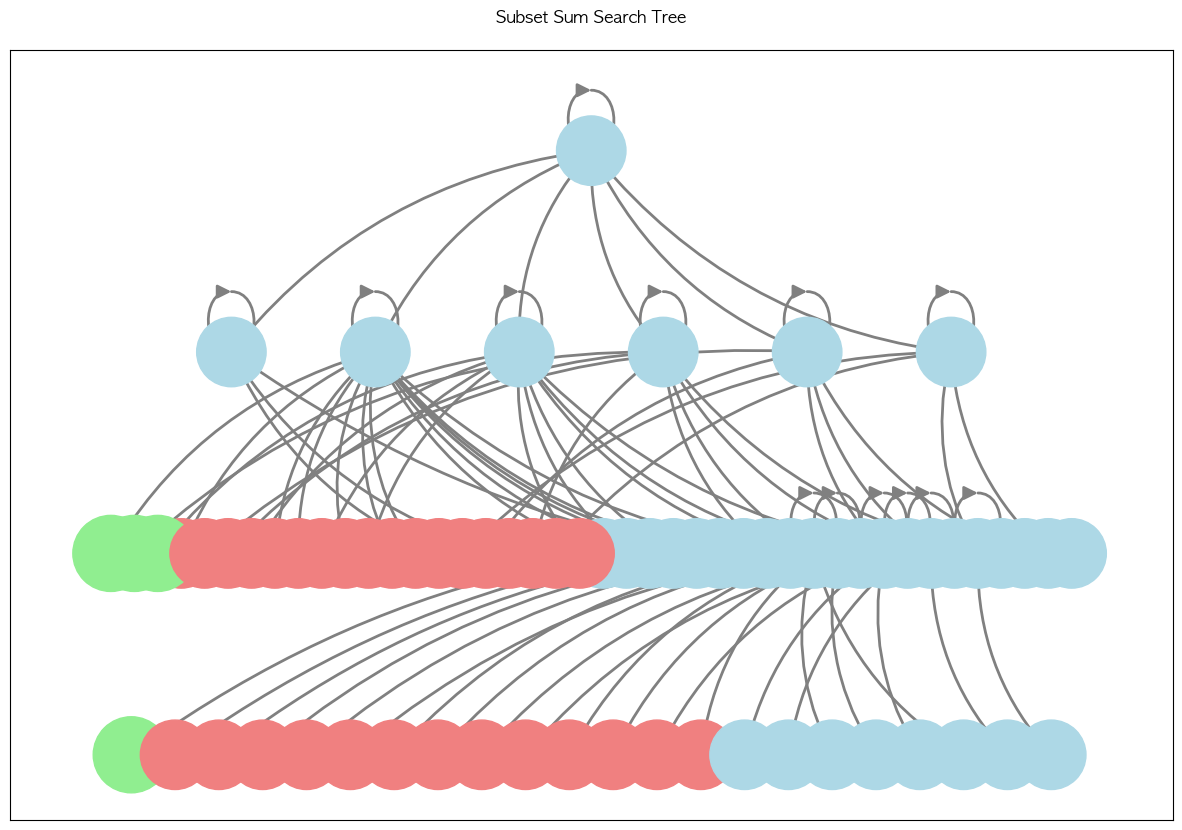

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import platform
from matplotlib.patches import Rectangle

def set_korean_font():
    """한글 폰트 설정"""
    system = platform.system()
    if system == "Darwin":  # macOS
        plt.rc('font', family='AppleGothic')
    elif system == "Windows":  # Windows
        plt.rc('font', family='Malgun Gothic')
    elif system == "Linux":  # Linux
        plt.rc('font', family='NanumGothic')
    plt.rc('axes', unicode_minus=False)

def create_tree_layout(G, root):
    """레벨 기반 트리 레이아웃 생성"""
    pos = {}
    level = {root: 0}
    
    # 각 노드의 레벨 계산
    to_visit = [root]
    while to_visit:
        current = to_visit.pop(0)
        children = list(G.neighbors(current))
        for child in children:
            if child not in level:
                level[child] = level[current] + 1
                to_visit.append(child)
    
    # 각 레벨별 노드 수 계산
    nodes_by_level = {}
    for node, lev in level.items():
        if lev not in nodes_by_level:
            nodes_by_level[lev] = []
        nodes_by_level[lev].append(node)
    
    # 노드 위치 계산
    for lev in nodes_by_level:
        nodes = nodes_by_level[lev]
        n = len(nodes)
        for i, node in enumerate(nodes):
            x = (i + 1) / (n + 1)
            y = 1 - lev * 0.2  # 레벨 간격 조정
            pos[node] = (x, y)
    
    return pos

def visualize_tree(G, root, title="Subset Sum Search Tree"):
    """트리 시각화"""
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title(title, pad=20, fontsize=14)

    if not G.nodes():
        return

    pos = create_tree_layout(G, root)
    
    # 엣지 그리기
    nx.draw_networkx_edges(G, pos, 
                          edge_color='gray',
                          arrows=True,
                          arrowsize=15,
                          width=1.5,
                          connectionstyle="arc3,rad=0.2")

    # 노드 스타일 설정 및 그리기
    node_colors = []
    node_sizes = []
    labels = {}
    
    for node in G.nodes():
        if "Found" in node:
            node_colors.append('#90EE90')  # 연한 초록색
            node_sizes.append(3000)
        elif "Invalid" in node:
            node_colors.append('#FFB6C1')  # 연한 빨간색
            node_sizes.append(2500)
        else:
            node_colors.append('#ADD8E6')  # 연한 파란색
            node_sizes.append(2500)
        
        # 레이블 포맷팅
        if '\n' in node:
            parts = node.split('\n')
            labels[node] = f"{parts[0]}\n{parts[1]}"
        else:
            labels[node] = node

    # 노드 그리기
    nx.draw_networkx_nodes(G, pos,
                          node_color=node_colors,
                          node_size=node_sizes,
                          edgecolors='gray',
                          linewidths=1)

    # 레이블 그리기
    nx.draw_networkx_labels(G, pos, labels,
                           font_size=9,
                           font_weight='bold')

    # 범례 추가
    legend_elements = [
        Rectangle((0, 0), 1, 1, facecolor='#ADD8E6', label='탐색 중'),
        Rectangle((0, 0), 1, 1, facecolor='#90EE90', label='해결책 발견'),
        Rectangle((0, 0), 1, 1, facecolor='#FFB6C1', label='유효하지 않음')
    ]
    ax.legend(handles=legend_elements, 
             loc='upper right', 
             fontsize=10)

    plt.axis('off')
    plt.tight_layout()
    plt.draw()
    plt.pause(0.5)

def subset_sum_visual(numbers, target, subset=None, depth=0, G=None, parent=None, root=None):
    """부분집합 합 문제 해결 및 시각화"""
    if subset is None:
        subset = []
    if G is None:
        G = nx.DiGraph()

    # 현재 노드 정보
    current_sum = sum(subset)
    current_node = f"Target: {target}\n{subset}"
    
    G.add_node(current_node)
    if parent is not None:
        G.add_edge(parent, current_node)
    if root is None:
        root = current_node

    # 주기적 시각화
    if depth % 2 == 0:
        visualize_tree(G, root)

    # 해결책 발견
    if target == 0:
        solution_node = f"Found Solution!\n{subset}"
        G.add_node(solution_node)
        G.add_edge(parent, solution_node)
        visualize_tree(G, root)
        return True, subset, G, root

    # 불가능한 경우
    if not numbers or target < 0:
        return False, subset, G, root

    x = numbers[0]
    remaining = numbers[1:]

    # x를 포함하는 경우
    found, sol1, G, root = subset_sum_visual(remaining, target - x, 
                                           subset + [x], depth + 1, 
                                           G, current_node, root)
    if found:
        return True, sol1, G, root

    # x를 제외하는 경우
    return subset_sum_visual(remaining, target, 
                           subset, depth + 1, 
                           G, current_node, root)

def solve_subset_sum_visual(numbers, target):
    """메인 실행 함수"""
    print(f"목표 합: {target}")
    print(f"주어진 집합: {numbers}")
    print("=" * 50)

    set_korean_font()
    plt.ion()
    
    exists, solution, G, root = subset_sum_visual(numbers, target)
    
    print("\n" + "=" * 50)
    if exists:
        print(f"해결책 발견!")
        print(f"부분집합: {solution}")
        print(f"합계: {sum(solution)}")
    else:
        print(f"해결책이 존재하지 않습니다.")
    print("=" * 50)
    
    visualize_tree(G, root, "탐색 결과 트리")
    plt.ioff()
    plt.show()
    
    return exists, solution

if __name__ == "__main__":
    X = [8, 6, 7, 5, 3, 10, 9]
    T = 15
    solve_subset_sum_visual(X, T)